In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df = pd.DataFrame(data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

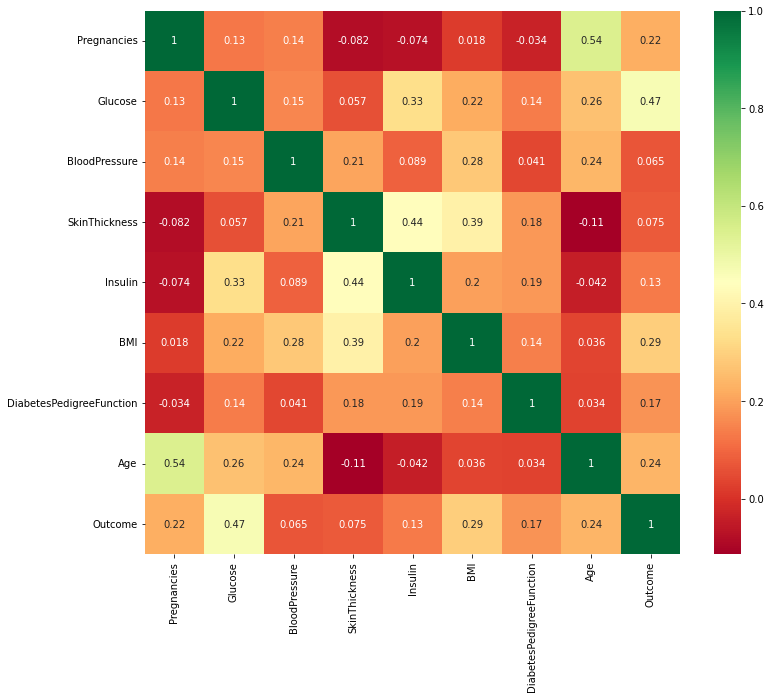

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [10]:
cols_clean = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
for i in cols_clean:
    df[i] = df[i].replace(0,np.NaN)
    cols_mean = int(df[i].mean(skipna=True))
    df[i] = df[i].replace(np.NaN, cols_mean)
data1 = df
data1.head().style.highlight_max(color="lightblue").highlight_min(color="red")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000000,72.000000,35.000000,155.000000,33.600000,0.627000,50,1
1,1,85.000000,66.000000,29.000000,155.000000,26.600000,0.351000,31,0
2,8,183.000000,64.000000,29.000000,155.000000,23.300000,0.672000,32,1
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21,0
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33,1


In [11]:
print(data1.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness    Insulin   
count   768.000000  768.000000     768.000000     768.000000  768.00000  \
mean      3.845052  121.682292      72.386719      29.108073  155.28125   
std       3.369578   30.435999      12.096642       8.791221   85.02155   
min       0.000000   44.000000      24.000000       7.000000   14.00000   
25%       1.000000   99.750000      64.000000      25.000000  121.50000   
50%       3.000000  117.000000      72.000000      29.000000  155.00000   
75%       6.000000  140.250000      80.000000      32.000000  155.00000   
max      17.000000  199.000000     122.000000      99.000000  846.00000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450911                  0.471876   33.240885    0.348958  
std      6.875366                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000 

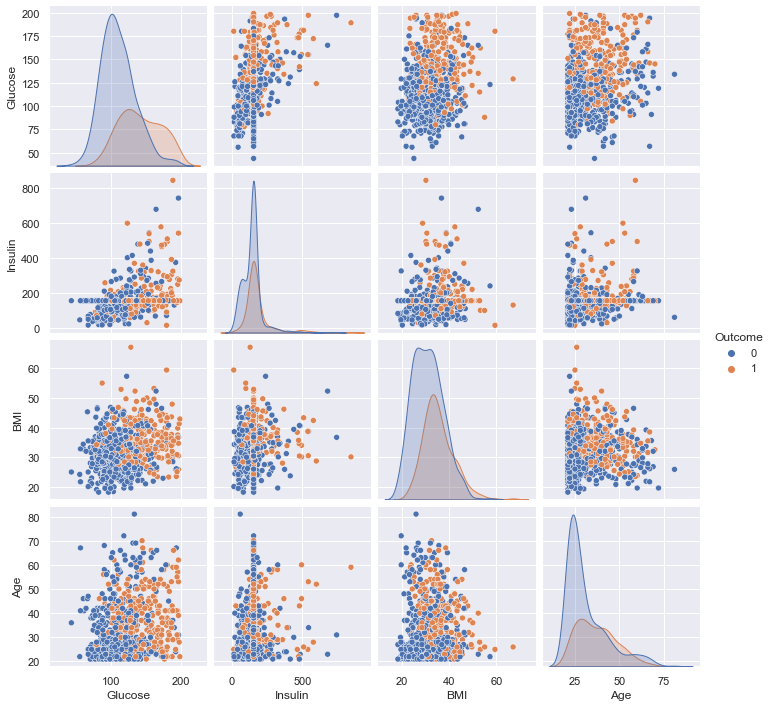

In [13]:

%matplotlib inline

graph = ['Glucose','Insulin','BMI','Age','Outcome']
sns.set()
# print(sns.pairplot(data1[graph],hue='Outcome', diag_kind='kde'))
print(sns.pairplot(data1[graph],hue='Outcome', diag_kind='kde'))

In [14]:
# for the purpose of simplicity and analysing the most relevent  data , we will select three features of the dataset
# Glucose , Insulin and BMI
# defining variables and features for the dataset for splitting 
# q_cols = ['Glucose','Insulin','BMI','Outcome']
q_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = data1[q_cols]
print(df.head(2))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0            6    148.0           72.0           35.0    155.0  33.6  \
1            1     85.0           66.0           29.0    155.0  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  


In [15]:
# # let's split the data into training and testing datasets
# split = 0.75 # 75% train and 25% test dataset
# total_len = len(df)
# split_df = int(total_len*split)
# train, test = df.iloc[:split_df,0:4],df.iloc[split_df:,0:4] 
# train_x = train[['Glucose','Insulin','BMI']]
# train_y = train['Outcome']
# test_x = test[['Glucose','Insulin','BMI']]
# test_y = test['Outcome']

# Split the data into training and testing datasets
split = 0.75  # 75% train and 25% test dataset
total_len = len(df)
split_df = int(total_len * split)
train, test = df.iloc[:split_df], df.iloc[split_df:]

# Select the columns specified in q_cols for training and testing
train_x = train[q_cols[:-1]]  # Exclude the 'Outcome' column from features
train_y = train['Outcome']    # Target variable
test_x = test[q_cols[:-1]]    # Exclude the 'Outcome' column from features
test_y = test['Outcome']      # Target variable


In [16]:
a = len(train_x) 
b = len(test_x)
print(' Training data =',a,'\n','Testing data =',b,'\n','Total data length = ',a+b)

 Training data = 576 
 Testing data = 192 
 Total data length =  768


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def knn(x_train, y_train, x_test, y_test,n):
    n_range = range(1, n)
    results = []
    for n in n_range:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(x_train, y_train)
        #Predict the response for test dataset
        predict_y = knn.predict(x_test)
        accuracy = metrics.accuracy_score(y_test, predict_y)
        #matrix = confusion_matrix(y_test,predict_y)
        #seaborn_matrix = sns.heatmap(matrix, annot = True, cmap="Blues",cbar=True)
        results.append(accuracy)
    return results

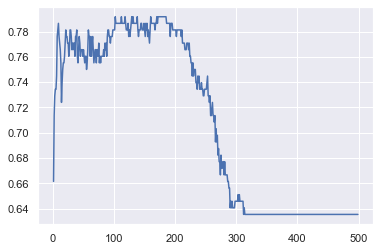

In [25]:
n= 500
output = knn(train_x,train_y,test_x,test_y,n)
n_range = range(1, n)
plt.plot(n_range, output)

In [19]:
# best k that could optimize this model is between 100 to 200 offering a 77% accuracy
# ideal k value for this dataset should be 150 give or take

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
y_pred = knn(train_x,train_y,test_x,test_y,n)
cnf_matrix = confusion_matrix(test_y, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [192, 499]

Text(0.5, 12.5, 'Predicted label')

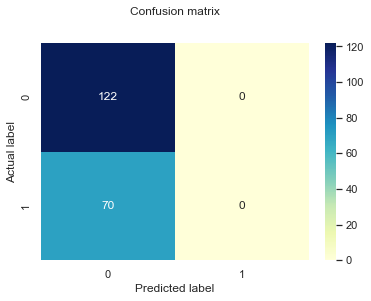

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
y_pred = knn(train_x,train_y,test_x,test_y,n)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
# Define your KNN function to return predictions
def knn2(x_train, y_train, x_test, y_test, n):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    # Predict the response for the test dataset
    predict_y = knn.predict(x_test)
    return predict_y

In [29]:
n = 500
y_pred = knn2(train_x, train_y, test_x, test_y, n)
cnf_matrix = confusion_matrix(test_y, y_pred)

In [30]:
# Now you can calculate other metrics like accuracy, precision, recall, etc.
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
fbeta = fbeta_score(test_y, y_pred, beta=0.5)

C:\Users\1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Print the confusion matrix and other metrics
print("Confusion Matrix:\n", cnf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("F-beta Score:", fbeta)

Confusion Matrix:
 [[122   0]
 [ 70   0]]
Accuracy: 0.6354166666666666
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
F-beta Score: 0.0


Text(0.5, 12.5, 'Predicted label')

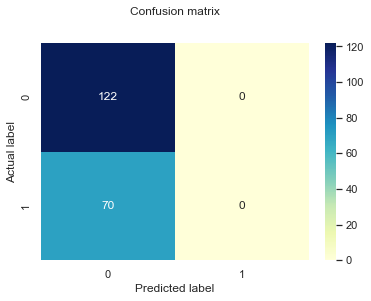

In [32]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')